In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
ID_PATHS = [r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.00',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.25_n=0.00',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.50_n=0.00',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.75_n=0.00',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_01_s=57_i=0.75_n=0.009',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=19_i=0.00_n=0.009',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=38_i=0.25_n=0.009',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=57_i=0.50_n=0.009',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=57_i=1.00_n=0.009',
            r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.00_n=0.00',
            r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.25_n=0.00',
            r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.50_n=0.00',
            r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.25_n=0.00',
            r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.50_n=0.00',
            r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.75_n=0.00',
            # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.00_n=0.0',
            # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.25_n=0.0',
            # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.50_n=0.0',
            # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.25_n=0.0',
            # #r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.50_n=0.0',
            # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.75_n=0.0',
            # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.75_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.00_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.25_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.50_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.75_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.25_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.50_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=0.75_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=1.00_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=0.50_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_06_s=19_i=0.25_n=0.0',
            # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_06_s=19_i=0.50_n=0.0'
            ]
OOD_PATHS = [
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.01',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.25_n=0.01',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.50_n=0.01',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.75_n=0.01',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=57_i=1.00_n=0.02',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=38_i=0.25_n=0.02',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=57_i=0.50_n=0.02',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_07_s=19_i=0.00_n=0.02',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_01_s=57_i=0.75_n=0.02',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.05',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.25_n=0.05',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.50_n=0.05',
            r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.75_n=0.05',

In [3]:
#check rmse difference by file
F1_Paths = [
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.00',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.25_n=0.00',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.50_n=0.00',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.75_n=0.00',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.01',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.05',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.25_n=0.01',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.25_n=0.05',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.50_n=0.01',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.50_n=0.05',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.75_n=0.01',
    r'G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=38_i=0.75_n=0.05'
]

F2_Paths = [
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.00_n=0.00',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.25_n=0.00',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.50_n=0.00',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.25_n=0.00',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.50_n=0.00',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.75_n=0.00',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.00_n=0.01',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=19_i=0.00_n=0.05',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.25_n=0.01',
    r'G:\DeepRFT\GoPro03851101\GoPro0385_11_01_00_s=38_i=0.25_n=0.05'
]

F3_Paths = [
    r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.00_n=0.0',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.25_n=0.0',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.50_n=0.0',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.25_n=0.0',
            #r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.50_n=0.0',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.75_n=0.0',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.75_n=0.0',
    r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.50_n=0.01',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=19_i=0.50_n=0.05',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.25_n=0.01',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.25_n=0.05',
           # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.50_n=0.01',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.50_n=0.05',
            r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.75_n=0.01'
           # r'G:\DeepRFT\GoPro08811101\GoPro0881_11_01_07_s=38_i=0.75_n=0.05',
]

F4_Paths = [
    r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.00_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.25_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.50_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.75_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.25_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.50_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=0.75_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=1.00_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=0.50_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_06_s=19_i=0.25_n=0.0',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_06_s=19_i=0.50_n=0.0',
             r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.00_n=0.01',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.25_n=0.05',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=19_i=0.50_n=0.01',
           # r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.75_n=0.05',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.25_n=0.01',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=38_i=0.50_n=0.05',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=0.75_n=0.01',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=1.00_n=0.05',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_05_s=57_i=0.50_n=0.01',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_06_s=19_i=0.25_n=0.05',
            r'G:\DeepRFT\GoPro08621100\GoPro0862_11_00_06_s=19_i=0.50_n=0.05'

]



Path_list = [F2_Paths,F1_Paths,F3_Paths,F4_Paths]

In [4]:
graph_df = pd.DataFrame()

for i in range(0,len(Path_list)):
    for p in Path_list[i]:
        path = pd.read_csv(os.path.join(p, 'RMSE_fit5_alt.csv'))
        path['file'] = i
        if p in ID_PATHS:
            path['class'] = 0
        else:
            path['class'] = 1
        graph_df = pd.concat([graph_df, path], axis=0)


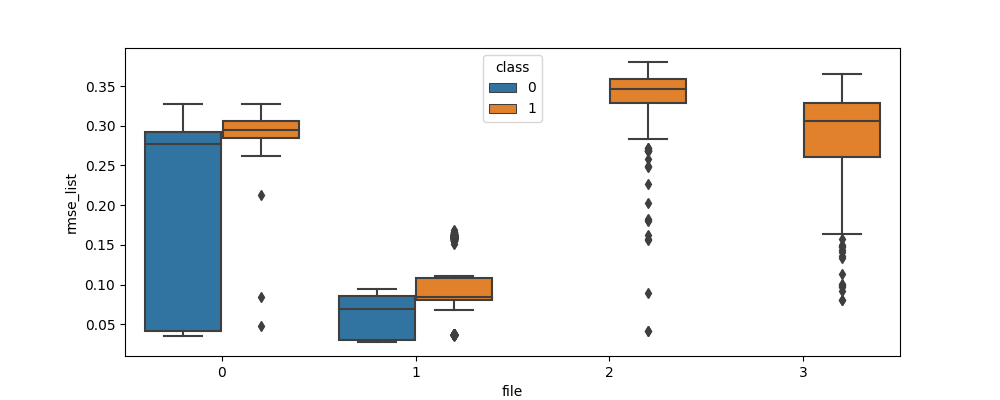

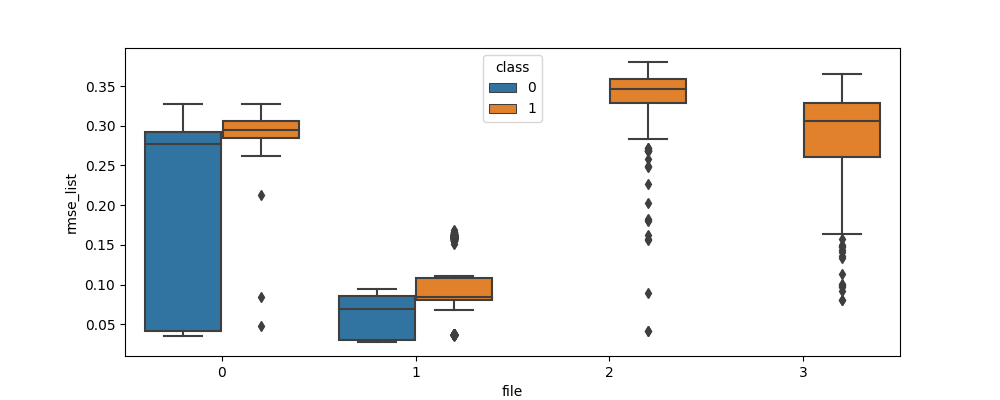

In [5]:
%matplotlib widget
fig3 = plt.figure(figsize=(10,4))
ax = fig3.subplots(1,1)
sns.boxplot(data = graph_df, x='file',y='rmse_list',hue='class')
fig3.show()

In [6]:
def remove_outliers(df):
    for col in df.columns:
        if col != 'class':
            z = abs((df[col] - np.mean(df[col]))/np.std(df[col]))
            df = df.iloc[np.where(z<2.5)[0],:]
    return df
    

In [7]:
id_csv_list, ood_csv_list = [], []
for id_path in ID_PATHS:
    id_csv = pd.read_csv(os.path.join(id_path, 'RMSE_fit5_alt.csv'))
    id_csv['class'] = 0
    id_csv = remove_outliers(id_csv)
    print(id_csv.describe())
    id_csv_list.append(id_csv)
    print(id_path, np.mean(id_csv, axis=0))
for ood_path in OOD_PATHS:
    ood_csv = pd.read_csv(os.path.join(ood_path, 'RMSE_fit5_alt.csv'))
    ood_csv['class'] = 1
    ood_csv = remove_outliers(ood_csv)
    print(ood_csv.describe())
    ood_csv_list.append(ood_csv)
    print(ood_path, np.mean(ood_csv, axis=0))
id_csv = pd.concat(id_csv_list, axis=0)
ood_csv = pd.concat(ood_csv_list, axis=0)
df = pd.concat([id_csv, ood_csv], axis=0)
df = df.drop(['rmse_list'], axis=1)  # e0 is the ground truth
# prepare X and Y
X = df.drop(['class'], axis=1)
Y = df['class']

       rmse_fit_list  xrmse_fit_list  rmse_list  xrmse_list  bias_list  \
count      93.000000       93.000000  93.000000   93.000000  93.000000   
mean        0.045504        0.007268   0.083027    0.022509   0.030883   
std         0.000548        0.000645   0.000580    0.000118   0.000374   
min         0.044129        0.005895   0.081708    0.022256   0.030051   
25%         0.045129        0.006756   0.082536    0.022421   0.030615   
50%         0.045602        0.007250   0.083031    0.022511   0.030931   
75%         0.045919        0.007701   0.083406    0.022575   0.031138   
max         0.046771        0.008716   0.084463    0.022757   0.031762   

       xbias_list  class  
count   93.000000   93.0  
mean     0.014932    0.0  
std      0.000711    0.0  
min      0.013291    0.0  
25%      0.014467    0.0  
50%      0.014999    0.0  
75%      0.015434    0.0  
max      0.016408    0.0  
G:\DeepRFT\GoPro03961100\GoPro0396_11_00_00_s=19_i=0.00_n=0.00 rmse_fit_list     0.045504


In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

The size of each list is small probablity there's some error with the outlier function --> check later

fitting wellness --> didn't understand, one very high the other very low

# Logistic Regression

### Fit Model

In [12]:
model = LogisticRegression(C=1, solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(C=1, solver='liblinear')

In [13]:
model.score(X_train, Y_train)

0.752129471890971

In [14]:
from sklearn import metrics
cnf_matrix_train = metrics.confusion_matrix(Y_train,model.predict(X_train))
cnf_matrix_train

array([[289, 219],
       [ 72, 594]], dtype=int64)

### Thredshold Selection

In [15]:
def create_cm(model,X_train,Y_train):
    y_score = model.predict_proba(X_train)[:,1]
    y_pred = model.predict(X_train)

    cfm = pd.DataFrame(y_score, columns=['y_score'])
    cfm['y_pred'] = y_pred
    cfm['y_true'] = Y_train.values
    

    thrs = [0] + list(np.sort(list(set(y_score))))
    res = []
    for thr in thrs:
        cfm['y_pred'] = (cfm['y_score'] > thr)*1
        tp = len(cfm[(cfm['y_pred'] == 1) & (cfm['y_true'] == 1)])
        tn = len(cfm[(cfm['y_pred'] == 0) & (cfm['y_true'] == 0)])
        fp = len(cfm[(cfm['y_pred'] == 1) & (cfm['y_true'] == 0)])
        fn = len(cfm[(cfm['y_pred'] == 0) & (cfm['y_true'] == 1)])
        res.append([thr, tp, tn, fp, fn])

    cm = pd.DataFrame(res)
    cm.columns = ['thr', 'tp', 'tn', 'fp', 'fn']
    cm['tpr'] = cm['tp'] / (cm['tp'] + cm['fn'])
    cm['fpr'] = cm['fp'] / (cm['fp'] + cm['tn'])

    return cm
     


In [16]:
cm = create_cm(model,X_train,Y_train)
cm

,thr,tp,tn,fp,fn,tpr,fpr
0,0.000000,666,0,508,0,1.000000,1.000000
1,0.383956,666,1,507,0,1.000000,0.998031
2,0.384898,666,2,506,0,1.000000,0.996063
3,0.385360,666,3,505,0,1.000000,0.994094
4,0.385422,666,4,504,0,1.000000,0.992126
...,...,...,...,...,...,...,...
1170,0.960632,4,508,0,662,0.006006,0.000000
1171,0.960965,3,508,0,663,0.004505,0.000000
1172,0.962152,2,508,0,664,0.003003,0.000000
1173,0.962943,1,508,0,665,0.001502,0.000000


In [17]:
def plot_ROC_Curve(model,X_train,Y_train):
    cm = create_cm(model,X_train,Y_train)
    fig3 = plt.figure(figsize=(4,4))
    ax3 = fig3.subplots()
    ax3.plot(cm['fpr'], cm['tpr'])
    ax3.plot([0,1], [0,1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

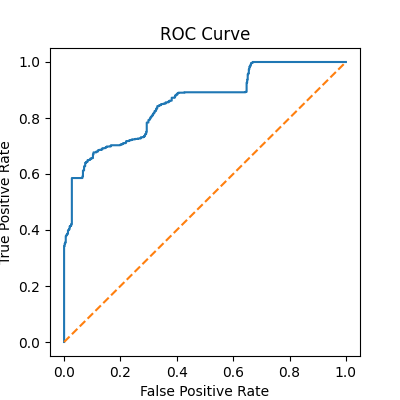

In [18]:
plot_ROC_Curve(model,X_train,Y_train)

In [19]:
def find_optimal_thr(model,X_train,Y_train):
    cm = create_cm(model,X_train,Y_train)
    #optimal thredshold is the thr when tpr is 1 and fpr is smallest
    optimal_thr = cm[(cm['tpr'] == 1) & (cm['fpr'] == cm[cm['tpr'] == 1]['fpr'].min())]['thr'].values[0]
    return optimal_thr

In [20]:
optimal_thr = find_optimal_thr(model,X_train,Y_train)
optimal_thr

0.44448007597543865

In [21]:
y_score_test = model.predict_proba(X_train)[:,1]

cfm_test = pd.DataFrame(y_score_test, columns=['y_score'])
cfm_test['y_pred'] = (cfm_test['y_score'] > optimal_thr)*1
cfm_test['y_true'] = Y_train.values

cfm_test.head()

,y_score,y_pred,y_true
0,0.497714,1,0
1,0.509129,1,1
2,0.384898,0,0
3,0.529391,1,0
4,0.435840,0,0


In [22]:
tpr_test = len(cfm_test[(cfm_test['y_pred'] == 1) & (cfm_test['y_true'] == 1)]) / len(cfm_test[cfm_test['y_true'] == 1])
fpr_test = len(cfm_test[(cfm_test['y_pred'] == 1) & (cfm_test['y_true'] == 0)]) / len(cfm_test[cfm_test['y_true'] == 0])
accuracy_test = (len(cfm_test[(cfm_test['y_pred'] == 1) & (cfm_test['y_true'] == 1)]) + len(cfm_test[(cfm_test['y_pred'] == 0) & (cfm_test['y_true'] == 0)])) / len(cfm_test)

In [23]:

tpr_test, fpr_test, accuracy_test  

(1.0, 0.6692913385826772, 0.7103918228279387)

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 8)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [25]:
KNN.score(X_train, Y_train)

1.0

In [26]:
create_cm(KNN,X_train,Y_train)

,thr,tp,tn,fp,fn,tpr,fpr
0,0.0,666,508,0,0,1.0,0.0
1,0.0,666,508,0,0,1.0,0.0
2,1.0,0,508,0,666,0.0,0.0


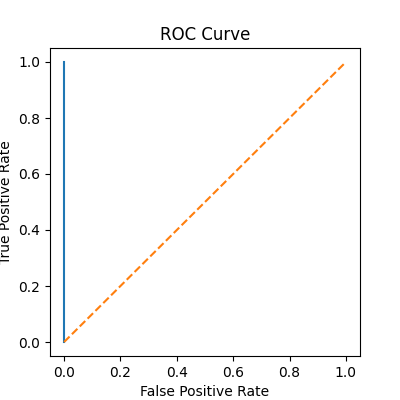

In [27]:
plot_ROC_Curve(KNN,X_train,Y_train)

## XGBoosting & RF Model selection

In [28]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
from xgboost import XGBClassifier

In [30]:
#model selection using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score

# define the grid search parameters for random forest
param_grid_rf = {
    'n_estimators': [10, 30, 50, 80],
    'max_depth': [8, 9, 10,15,20,25,30],
    'min_samples_split': [1,2, 5, 8, 10],
    'min_samples_leaf': [1, 3,  6, 9],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# define the grid search parameters for XGBoost
param_grid_xg = {
    'n_estimators': [10, 30, 60, 90],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7, 9, 10],
    'gamma': [0, 0.5],
    'subsample': [0.3,0.6, 0.9],
    'colsample_bytree': [0.6, 0.9],
    'reg_alpha': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [1, 1.25, 1.5, 1.75, 2.0]
}

# define the grid search parameters for KNN
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

# define the grid search parameters for logistic regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}




In [31]:
# find the optimal parameters for random forest
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_rf, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 3, 6, 9],
                                        'min_samples_split': [1, 2, 5, 8, 10],
                                        'n_estimators': [10, 30, 50, 80]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 9}

In [33]:
def create_param_grid(best_param):
    param_grid = {}
    for key in best_param.keys():
        if (isinstance(best_param[key], int)):
            param_grid[key] = [*range(max(best_param[key]-2,0),best_param[key]+10,1)]
        elif(isinstance(best_param[key], float)):
            if(best_param[key] < 1):
                param_grid[key] = list(np.arange(max(best_param[key]-0.1,0),best_param[key]+0.1,0.05))
            else:
                param_grid[key] = list(np.arange(max(best_param[key]-1.0,0),best_param[key]+1.0,1.0))
        else:
            param_grid[key] = [best_param[key]]

    return param_grid

In [34]:
param_grid_rf = {}
param_grid_rf['n_estimators'] = [50,60,70,80,90,100]
param_grid_rf['min_samples_split'] = [3,4,5,6,7,8,9,10,15]
param_grid_rf['min_samples_leaf'] = [1,2,3]
param_grid_rf['max_depth'] = [20,25,30,35,40,50]
param_grid_rf['max_features'] = ['sqrt']
param_grid_rf


{'n_estimators': [50, 60, 70, 80, 90, 100],
 'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'max_depth': [20, 25, 30, 35, 40, 50],
 'max_features': ['sqrt']}

In [35]:

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, verbose=2, n_jobs = -1)
rf_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 15],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             verbose=2)

In [36]:
rf_best = rf_grid.best_estimator_
#optimal parameters for random forest
rf_best

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=50)

In [37]:
rf_best.score(X_train, Y_train),rf_best.score(X_valid,Y_valid)

(1.0, 1.0)

In [38]:
#find the optimal parameters for XGBoost
xg = xgb.XGBClassifier()
xg_random = RandomizedSearchCV(estimator = xg, param_distributions = param_grid_xg, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
xg_random.fit(X_train, Y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.9],
                                        'gamma': [0, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7, 9, 10],
                                        'n_estimators': [10, 30, 60, 90],
                                        'reg_alpha': [0, 0.25, 0.5, 1.0],
                                        'reg_lambda': [1, 1.25, 1.5, 1.75, 2.0],
                                        'subsample': [0.3, 0.6, 0.9]},
                   random_state=42, verbose=2)

In [39]:
xg_random.best_params_

{'subsample': 0.9,
 'reg_lambda': 1,
 'reg_alpha': 0.25,
 'n_estimators': 60,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.9}

## XGboost parameters tuning

steps
1. using the best_param chosen by random cv to be the initial values for parameters

In [40]:

from sklearn.model_selection import cross_val_score

# function to create result matrix for each model
def paramtuning_result(model,X_test,Y_test):
    #test accuracy
    test_accuracy = cross_val_score(model,X_test,Y_test,cv=5).mean()
    #test precision
    y_pred = model.predict(X_test)
    test_precision = precision_score(Y_test, y_pred)
    #test recall
    test_recall = recall_score(Y_test, y_pred)
    #test f1 score
    test_f1 = f1_score(Y_test, y_pred)
    #test auc
    y_pred_proba = model.predict_proba(X_test)[:,1]
    test_auc = roc_auc_score(Y_test, y_pred_proba)
    #area under precision recall curve
    test_ap = average_precision_score(Y_test, y_pred_proba)

    df = pd.DataFrame({'Model': [str(model)],
                        'Test Accuracy': [test_accuracy],
                        'Test Precision': [test_precision],
                        'Test Recall': [test_recall],
                        'Test F1 Score': [test_f1],
                        'Test AUC': [test_auc],
                        'Test Average Precision': [test_ap]
                        })
    return df



In [41]:
initial_param = xg_random.best_params_
initial_param['scale_pos_weight'] = 1
initial_param

{'subsample': 0.9,
 'reg_lambda': 1,
 'reg_alpha': 0.25,
 'n_estimators': 60,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.9,
 'scale_pos_weight': 1}

In [42]:
xg_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1.0,
 reg_alpha = 0.25)
xg_model.fit(X_train,Y_train)
paramtuning_result(xg_model,X_train,Y_train)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC,Test Average Precision
0,"XGBClassifier(base_score=None, booster=None, c...",0.999149,1.0,1.0,1.0,1.0,1.0


In [43]:
param_test1 = {
 'max_depth':range(5,18,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 #max_depth=6,
 #min_child_weight=1,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1,
 reg_alpha = 0.25),param_grid = param_test1, scoring='accuracy',n_jobs=4,cv=5)


gsearch1.fit(X_train,Y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 1}, 0.9982978723404254)

In [44]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=11,
 min_child_weight=1,
 #gamma=0,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1,
 reg_alpha = 0.25), 
 param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)

gsearch3.fit(X_train,Y_train)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, 0.9982978723404254)

In [45]:
param_test4 = {
 'subsample':[i/10.0 for i in range(2,10)],
 'colsample_bytree':[i/10.0 for i in range(6,15)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=11,
 min_child_weight=1,
 gamma=0.8,
 #subsample=0.9,
 #colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1,
 reg_alpha = 0.25), 
 param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)

gsearch4.fit(X_train,Y_train)
gsearch4.best_params_, gsearch4.best_score_

c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "c:\Users\ozlab\.conda\envs\

({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.9991489361702127)

In [46]:
param_test5 = {
 'subsample':[i/100.0 for i in range(50,120,5)],
 'colsample_bytree':[i/100.0 for i in range(55,100,5)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=11,
 min_child_weight=1,
 gamma=0.8,
 #subsample=0.9,
 #colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1,
 reg_alpha = 0.25), 
 param_grid = param_test5, scoring='accuracy',n_jobs=4, cv=5)

gsearch5.fit(X_train,Y_train)
gsearch5.best_params_, gsearch5.best_score_

c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "c:\Users\ozlab\.conda\envs\

({'colsample_bytree': 0.55, 'subsample': 1.0}, 0.9991489361702127)

In [47]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 0.25, 0.5, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=11,
 min_child_weight=1,
 gamma=0.8,
 subsample=1.0,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1),param_grid = param_test6, scoring='accuracy',n_jobs=4, cv=5)

gsearch6.fit(X_train,Y_train)
gsearch6.best_params_, gsearch6.best_score_


({'reg_alpha': 1e-05}, 0.9982978723404254)

In [48]:
param_test7 = {
 'reg_alpha':[0,1e-05,0.01, 0.05, 0.08,0.10,0.15,0.25,0.30,0.35,0.40,0.45,0.8,0.9,1]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=11,
 min_child_weight=1,
 gamma=0.8,
 subsample=0.85,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1), 
 param_grid = param_test6, scoring='accuracy',n_jobs=4, cv=5)

gsearch7.fit(X_train,Y_train)
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 1e-05}, 0.9991489361702127)

In [49]:
xg_best = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_lambda = 1,
 reg_alpha = 0.25)
 

In [50]:
xg_best.fit(X_train, Y_train)
xg_best.score(X_train, Y_train), xg_best.score(X_valid, Y_valid)

(0.9991482112436116, 0.9965986394557823)

In [51]:


# function to create result matrix for each model
def create_result_matrix(model,X_test,Y_test):
    #test accuracy
    test_accuracy = model.score(X_test,Y_test)
    #test precision
    y_pred = model.predict(X_test)
    test_precision = precision_score(Y_test, y_pred)
    #test recall
    test_recall = recall_score(Y_test, y_pred)
    #test f1 score
    test_f1 = f1_score(Y_test, y_pred)
    #test auc
    y_pred_proba = model.predict_proba(X_test)[:,1]
    test_auc = roc_auc_score(Y_test, y_pred_proba)
    #area under precision recall curve
    test_ap = average_precision_score(Y_test, y_pred_proba)

    df = pd.DataFrame({'Model': [str(model)],
                        'Test Accuracy': [test_accuracy],
                        'Test Precision': [test_precision],
                        'Test Recall': [test_recall],
                        'Test F1 Score': [test_f1],
                        'Test AUC': [test_auc],
                        'Test Average Precision': [test_ap]
                        })
    return df



In [52]:
create_result_matrix(rf_best,X_train,Y_train)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC,Test Average Precision
0,"RandomForestClassifier(max_depth=20, min_sampl...",1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
create_result_matrix(xg_best,X_train,Y_train)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC,Test Average Precision
0,"XGBClassifier(base_score=None, booster=None, c...",0.999148,0.998501,1.0,0.99925,1.0,1.0


In [54]:
create_result_matrix(KNN,X_train,Y_train)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC,Test Average Precision
0,KNeighborsClassifier(n_neighbors=8),1.0,1.0,1.0,1.0,1.0,1.0


In [55]:
lg_best = LogisticRegression(class_weight = {0: optimal_thr, 1:(1-optimal_thr)}, penalty='l2')
lg_best.fit(X_train, Y_train)

LogisticRegression(class_weight={0: 0.44448007597543865, 1: 0.5555199240245614})

In [56]:
#result matrix for all models
result_matrix = pd.concat([create_result_matrix(rf_best,X_train,Y_train),
                            create_result_matrix(xg_best,X_train,Y_train),
                            create_result_matrix(KNN,X_train,Y_train),
                            create_result_matrix(lg_best,X_train,Y_train)
                            ], ignore_index=True)
result_matrix

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC,Test Average Precision
0,"RandomForestClassifier(max_depth=20, min_sampl...",1.000000,1.000000,1.0,1.000000,1.000000,1.000000
1,"XGBClassifier(base_score=None, booster=None, c...",0.999148,0.998501,1.0,0.999250,1.000000,1.000000
2,KNeighborsClassifier(n_neighbors=8),1.000000,1.000000,1.0,1.000000,1.000000,1.000000
3,LogisticRegression(class_weight={0: 0.44448007...,0.571550,0.569718,1.0,0.725886,0.853604,0.899391


# Validation Set Testing

In [57]:
import os, glob


wk_dir = r'G:\DeepRFT\GoPro04101100'
inputds = glob.glob(wk_dir+r'\GoPro0410_11_00*')

val_df = pd.DataFrame()

for inputd in inputds:
    df = pd.read_csv(inputd + r'\RMSE_fit5_alt.csv')
    if float(inputd.split('\\')[-1].split('_')[-1].split('=')[-1]) < 0.01:
        df['class'] = 0
    else:
        df['class'] = 1                                                               
    
    df = remove_outliers(df)
    print(df.describe())
    val_df = pd.concat([val_df,df],axis=0)


       rmse_fit_list  xrmse_fit_list  rmse_list  xrmse_list  bias_list  \
count      20.000000       20.000000  20.000000   20.000000  20.000000   
mean        0.049539        0.009597   0.044674    0.017933   0.006075   
std         0.012171        0.002011   0.001722    0.001169   0.001840   
min         0.031475        0.006321   0.040795    0.015988  -0.001456   
25%         0.037979        0.008101   0.044043    0.016769   0.006199   
50%         0.046554        0.009593   0.044697    0.018102   0.006278   
75%         0.059883        0.011072   0.045318    0.018752   0.006714   
max         0.067645        0.013348   0.048348    0.020038   0.007494   

       xbias_list  class  
count   20.000000   20.0  
mean     0.004557    1.0  
std      0.000860    0.0  
min      0.002850    1.0  
25%      0.004416    1.0  
50%      0.004773    1.0  
75%      0.004994    1.0  
max      0.005691    1.0  
       rmse_fit_list  xrmse_fit_list  rmse_list  xrmse_list  bias_list  \
count      22.00

In [58]:
val_df = val_df.drop('rmse_list',axis = 1)

In [59]:
X_test = val_df.drop('class',axis = 1)
Y_test = val_df['class']

In [60]:
#result matrix for all models
result_matrix_val = pd.concat([create_result_matrix(rf_best,X_test,Y_test),
                            create_result_matrix(xg_best,X_test,Y_test),
                            create_result_matrix(KNN,X_test,Y_test),
                            create_result_matrix(lg_best,X_test,Y_test)
                            ], ignore_index=True)
result_matrix_val

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC,Test Average Precision
0,"RandomForestClassifier(max_depth=20, min_sampl...",0.781161,0.748971,0.920742,0.826021,0.843393,0.871114
1,"XGBClassifier(base_score=None, booster=None, c...",0.766889,0.740331,0.903879,0.813971,0.864903,0.899865
2,KNeighborsClassifier(n_neighbors=8),0.684110,0.693333,0.789207,0.738170,0.675573,0.676559
3,LogisticRegression(class_weight={0: 0.44448007...,0.564225,0.564225,1.000000,0.721411,0.875469,0.898853


# Training Testing scatter plot

In [61]:
id_csv_list, ood_csv_list = [], []
for id_path in ID_PATHS:
    id_csv = pd.read_csv(os.path.join(id_path, 'RMSE_fit5_alt.csv'))
    id_csv['class'] = 0
    id_csv = remove_outliers(id_csv)
    id_csv_list.append(id_csv)
for ood_path in OOD_PATHS:
    ood_csv = pd.read_csv(os.path.join(ood_path, 'RMSE_fit5_alt.csv'))
    ood_csv['class'] = 1
    ood_csv = remove_outliers(ood_csv)
    ood_csv_list.append(ood_csv)
id_csv = pd.concat(id_csv_list, axis=0)
ood_csv = pd.concat(ood_csv_list, axis=0)
train_df = pd.concat([id_csv, ood_csv], axis=0)
train_df = train_df.drop('rmse_list',axis=1)
train_df['c'] = train_df['class']
train_df

,rmse_fit_list,xrmse_fit_list,xrmse_list,bias_list,xbias_list,class,c
1,0.045088,0.008468,0.022308,0.030185,0.013377,0,0
4,0.045906,0.006886,0.022411,0.030670,0.015189,0,0
5,0.045009,0.006271,0.022317,0.030747,0.015857,0,0
6,0.044823,0.006583,0.022340,0.030605,0.015500,0,0
7,0.045269,0.005895,0.022436,0.031595,0.016408,0,0
...,...,...,...,...,...,...,...
95,0.349259,0.092451,0.115943,0.013261,0.010150,1,1
96,0.338907,0.121424,0.113748,0.012977,0.009949,1,1
97,0.307287,0.044221,0.114310,0.012901,0.009899,1,1
98,0.311730,0.040271,0.114671,0.012843,0.009868,1,1


In [62]:
train_df.describe()

,rmse_fit_list,xrmse_fit_list,xrmse_list,bias_list,xbias_list,class,c
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,0.074798,0.012989,0.032417,0.016536,0.009553,0.561308,0.561308
std,0.068168,0.020489,0.026709,0.011023,0.005750,0.496396,0.496396
min,0.000015,0.000000,0.003429,-0.011529,-0.004385,0.000000,0.000000
25%,0.030105,0.004450,0.014519,0.008709,0.003969,0.000000,0.000000
50%,0.050129,0.007667,0.025175,0.016993,0.009717,1.000000,1.000000
75%,0.102639,0.012633,0.042193,0.025632,0.015197,1.000000,1.000000
max,0.366301,0.356440,0.121099,0.033610,0.020888,1.000000,1.000000


In [63]:
val_df['c'] = val_df['class']
val_df

,rmse_fit_list,xrmse_fit_list,xrmse_list,bias_list,xbias_list,class,c
1,0.038079,0.007744,0.017907,0.005366,0.003032,1,1
2,0.035071,0.007367,0.018445,0.006094,0.002850,1,1
3,0.037681,0.006321,0.020038,0.007494,0.005646,1,1
4,0.035718,0.007353,0.019714,0.006210,0.003464,1,1
5,0.036755,0.006879,0.018555,0.006004,0.004286,1,1
...,...,...,...,...,...,...,...
17,0.128513,0.007027,0.042768,0.007481,0.004136,1,1
18,0.124716,0.006371,0.041528,0.007854,0.004408,1,1
19,0.116417,0.006293,0.044071,0.008124,0.004522,1,1
20,0.124038,0.007243,0.042500,0.007830,0.004337,1,1


In [64]:
val_df.describe()

,rmse_fit_list,xrmse_fit_list,xrmse_list,bias_list,xbias_list,class,c
count,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,9.817744e+01,4.448668,0.056501,0.020258,0.015687,0.564225,0.564225
std,1.732539e+03,76.037459,0.070793,0.020660,0.010239,0.496094,0.496094
min,7.860037e-08,0.000000,0.005350,-0.074123,-0.026260,0.000000,0.000000
25%,3.097795e-02,0.003467,0.021180,0.007488,0.005598,0.000000,0.000000
50%,4.076414e-02,0.004687,0.028900,0.024279,0.017059,1.000000,1.000000
75%,8.657923e-02,0.007121,0.049001,0.037406,0.024920,1.000000,1.000000
max,3.745027e+04,2061.554268,0.295640,0.044803,0.031566,1.000000,1.000000


In [65]:
train_df0 = train_df[train_df['c'] == 0]
train_df1 = train_df[train_df['c'] == 1]
val_df0 = val_df[val_df['c'] == 0]
val_df1 = val_df[val_df['c'] == 1]

C:\Users\ozlab\AppData\Local\Temp\ipykernel_2508\3693910766.py:13: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax1.set_xlim(-0.01, 0.2)


(0.0, 0.08)

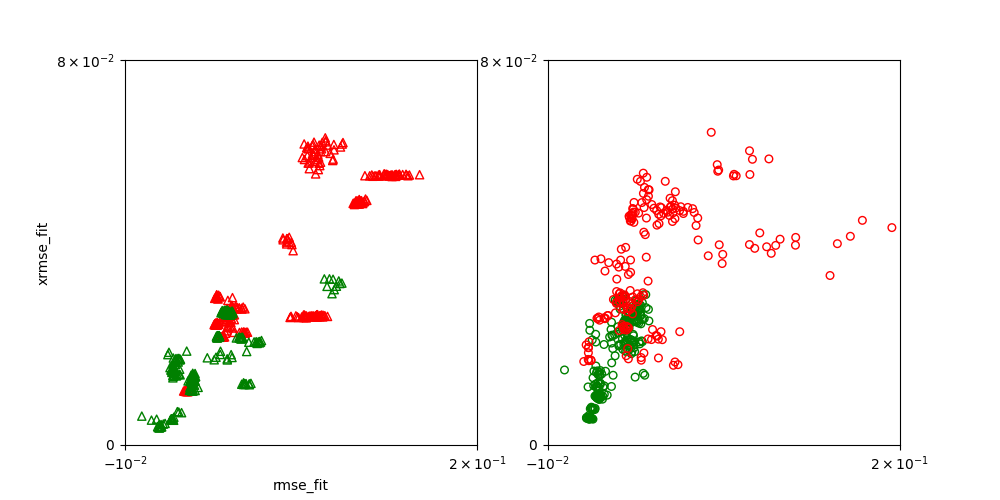

c:\Users\ozlab\.conda\envs\pytorch\lib\site-packages\ipympl\backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)


In [66]:
# enable interactive matplotlib
%matplotlib widget

fig = plt.figure(figsize= (10,5))
# ax1 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(121)

ax1.scatter(train_df1['rmse_fit_list'][::2], train_df1['xrmse_list'][::2], marker="^", facecolors="None", edgecolors= 'r', s=35, label = 'train_class1')
ax1.scatter(train_df0['rmse_fit_list'][::2], train_df0['xrmse_list'][::2], marker="^", facecolors="None", edgecolors= 'g', s=35, label = 'train_class0')

ax1.set_xlabel("rmse_fit")
ax1.set_xscale('symlog')
ax1.set_xlim(-0.01, 0.2)
ax1.set_ylabel("xrmse_fit")
ax1.set_yscale('symlog')
ax1.set_ylim(0, 0.08)
# ax1.set_zlabel('xrmse')
# ax1.set_zlim(0, 0.1)
# ax1.set_zscale('symlog')

# ax.legend()

# ax2 = fig.add_subplot(122, projection='3d')
ax2 = fig.add_subplot(122)
ax2.scatter(val_df0['rmse_fit_list'][::2], val_df0['xrmse_list'][::2], marker="o", facecolors="None", edgecolors= 'g',s=30, label = 'test_class0')
ax2.scatter(val_df1['rmse_fit_list'][::2], val_df1['xrmse_list'][::2], marker="o", facecolors="None", edgecolors= 'r',s=30, label = "test_class1")

# ax2.set_xlabel("rmse_fit")
ax2.set_xscale('symlog')
ax2.set_xlim(-0.01, 0.2)
# ax2.set_ylabel("xrmse_fit")
ax2.set_yscale('symlog')
ax2.set_ylim(0, 0.08)
# ax2.set_zlabel('xrmse')
# ax2.set_zlim(0, 0.1)
# ax2.set_zscale('symlog')


## Feature Importance

<BarContainer object of 5 artists>

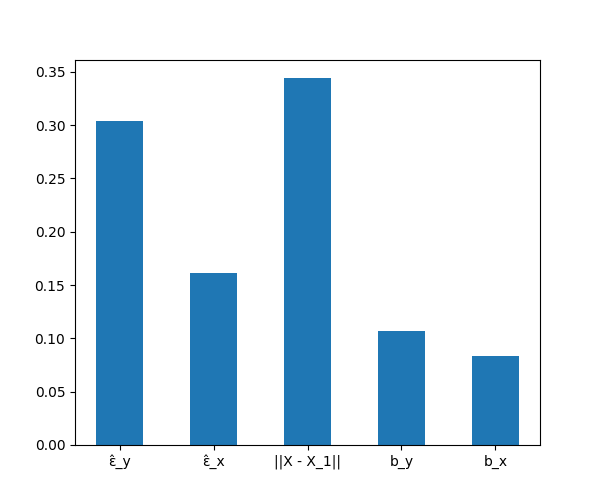

In [67]:
# features = pd.DataFrame({'features':['rmse_fit','xrmse_fit','xrmse','bias','xbias'],"rf_importance":rf_best.feature_importances_,"xgb_importance":xg_best.feature_importances_})
features = pd.DataFrame({'features':["\u03B5\u0302_y","\u03B5\u0302_x",'||X - X_1||','b_y','b_x'],"xgb_importance":xg_best.feature_importances_})
# features.plot(x="features", y=["xgb_importance"], kind="bar")

fig_imp = plt.figure(figsize=(6,5))
plt.bar(features['features'], features['xgb_importance'], width=0.5)



# Fig 2

In [68]:
inputds = [r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.01\RMSE_fit5_alt.csv',
           #r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.02\RMSE_fit5_alt.csv',
         #   r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.03\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.04\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.06\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.08\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.10\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.009\RMSE_fit5_alt.csv',
           #r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.02\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.2\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.3\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.02\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.2\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.3\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.02\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.009\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.2\RMSE_fit5_alt.csv',
           #r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.02\RMSE_fit5_alt.csv'
        ]


In [69]:
fig2_df = pd.DataFrame()
fig2_rmse = pd.DataFrame()

for inputd in inputds:
    df_i = pd.read_csv(inputd)
    df_i['noise level'] = inputd.split('\\')[-2].split('=')[-1]
    # print(inputd, df_i['noise level'])
    rmse_i = df_i['rmse_list']
    df_i = df_i.drop('rmse_list', axis=1)
    print(df_i.describe())
    fig2_df = pd.concat([fig2_df,df_i],axis=0)
    fig2_rmse = pd.concat([fig2_rmse,rmse_i], axis=0)

       rmse_fit_list  xrmse_fit_list  xrmse_list   bias_list  xbias_list  \
count     134.000000      134.000000  134.000000  134.000000  134.000000   
mean        0.041670        0.003903    0.027082    0.039300    0.024484   
std         0.004068        0.000597    0.001784    0.002393    0.001604   
min         0.034823        0.002936    0.023768    0.035457    0.021372   
25%         0.038500        0.003469    0.025744    0.037616    0.023423   
50%         0.041260        0.003772    0.027004    0.039165    0.024283   
75%         0.044312        0.004381    0.027963    0.040451    0.025320   
max         0.051967        0.005768    0.033236    0.046930    0.029865   

       class  
count  134.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\DeepRFT\\GoPro04101100\\GoPro0410_11_00_03_s=38_i=0.00_n=0.003\\RMSE_fit5_alt.csv'

In [ ]:
df_n_0 = fig2_df[fig2_df['noise level'] == '0.00']
df_n_1 = fig2_df[fig2_df['noise level'] == '0.01']
df_n_2 = fig2_df[fig2_df['noise level'] == '0.02']
#df_n_3 = fig2_df[fig2_df['noise level'] == '0.03']
df_n_4 = fig2_df[fig2_df['noise level'] == '0.04']
df_n_06 = fig2_df[fig2_df['noise level'] == '0.006']
df_n_03 = fig2_df[fig2_df['noise level'] == '0.003']
df_n_09 = fig2_df[fig2_df['noise level'] == '0.009']
df_n_6 = fig2_df[fig2_df['noise level'] == '0.06']
df_n_8 = fig2_df[fig2_df['noise level'] == '0.08']
df_n_10 = fig2_df[fig2_df['noise level'] == '0.10']


rmse_n_0 = fig2_rmse[fig2_df['noise level'] == '0.00']
rmse_n_2 = fig2_rmse[fig2_df['noise level'] == '0.02']
#rmse_n_3 = fig2_rmse[fig2_df['noise level'] == '0.03']
rmse_n_4 = fig2_rmse[fig2_df['noise level'] == '0.04']
rmse_n_1 = fig2_rmse[fig2_df['noise level'] == '0.01']
rmse_n_06 = fig2_rmse[fig2_df['noise level'] == '0.006']
rmse_n_03 = fig2_rmse[fig2_df['noise level'] == '0.003']
rmse_n_09 = fig2_rmse[fig2_df['noise level'] == '0.009']
rmse_n_6 = fig2_rmse[fig2_df['noise level'] == '0.06']
rmse_n_8 = fig2_rmse[fig2_df['noise level'] == '0.08']
rmse_n_10 = fig2_rmse[fig2_df['noise level'] == '0.10']

df_list = [df_n_0,
    df_n_03,
    df_n_06,
    #df_n_09,
    df_n_1,df_n_2,df_n_4,df_n_6,df_n_8,df_n_10]
rmse_list = [rmse_n_0,
    rmse_n_03,
    rmse_n_06,
    #rmse_n_09,
    rmse_n_1,rmse_n_2,rmse_n_4,rmse_n_6,rmse_n_8,rmse_n_10]

In [ ]:
df_n_0['class'] = list(np.zeros(224))

C:\Users\OzcanAlienware\AppData\Local\Temp\ipykernel_31184\3173903957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_0['class'] = list(np.zeros(224))


In [ ]:
df_n_2.describe()

,rmse_fit_list,xrmse_fit_list,xrmse_list,bias_list,xbias_list,class
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,0.043505,0.004451,0.023590,0.008278,0.005062,1.0
std,0.010137,0.000995,0.001111,0.002866,0.001547,0.0
min,0.026100,0.002940,0.021562,-0.001181,0.002999,1.0
25%,0.035523,0.003738,0.022583,0.007093,0.003717,1.0
50%,0.039146,0.004218,0.023907,0.009267,0.005047,1.0
75%,0.052171,0.004971,0.024398,0.010129,0.006309,1.0
max,0.068696,0.009170,0.026300,0.011741,0.008466,1.0


In [ ]:
recall_vals = []
accuracys = []
precisions = []
THRES = 0.9
for df in df_list:
    
    X = df.drop(['class', 'noise level'], axis = 1)
    Y = 1 if np.all(df['noise level'].to_numpy().astype('float') >= 0.01) else 0
    y_true = Y * np.ones([len(X),])
    y_prob = xg_best.predict_proba(X).astype('float')
    
    y_pred = y_prob[:,1] >= THRES  # OOD if prob >= THRES

    recall_vals.append(recall_score(y_true, y_pred))
    accuracys.append(accuracy_score(y_true, y_pred))
    precisions.append(precision_score(y_true, y_pred))

rmse_mean, rmse_std = [], []
for rmse in rmse_list:
    rmse_mean.append(np.mean(np.array(rmse)))
    rmse_std.append(np.std(np.array(rmse)))

c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning

In [ ]:
recall_vals,accuracys

([0.0, 0.0, 0.0, 0.0, 0.6382978723404256, 1.0, 1.0, 1.0, 1.0],
 [0.6830357142857143, 0.832, 1.0, 0.0, 0.6382978723404256, 1.0, 1.0, 1.0, 1.0])

(0.5, 1.05)

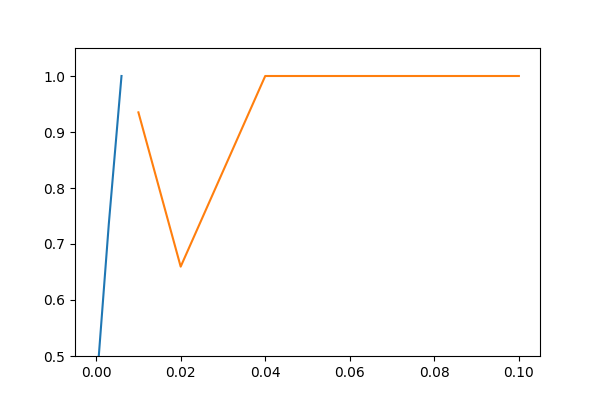

In [ ]:
fig2 = plt.figure(figsize=(6,4))
ax = fig2.add_subplot(111)
# ax2 = ax.twinx()
# ax.plot([0.0, 0.003, 0.006, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10],recall_vals,label = "recall")
ax.plot([0.0, 0.003, 0.006],accuracys[:3],label = "ID Accuracy")
ax.plot([0.01, 0.02, 0.04, 0.06, 0.08, 0.10], accuracys[3:], label = "OOD Accuracy")
# ax.plot([0.0,0.02,0.03],precisions,label = "precision")
ax.set_ylim([0.5,1.05])
# ax.legend()
# ax2.errorbar([0.0, 0.003, 0.006, 0.009, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.10],rmse_mean,rmse_std,color='gray',label = "RMSE")
# ax2.legend()

# Mahalanobis distance

(array([ 4., 17., 19.,  3.,  3., 18., 12.,  3., 11., 10.,  8., 14., 13.,
         8.,  2., 19., 61.,  8.,  9.,  7.,  9., 10.,  7.,  2.,  3.,  2.,
         2.,  1.,  0.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.3297343 ,  0.49185578,  0.65397727,  0.81609875,  0.97822023,
         1.14034171,  1.30246319,  1.46458467,  1.62670615,  1.78882763,
         1.95094911,  2.11307059,  2.27519207,  2.43731355,  2.59943504,
         2.76155652,  2.923678  ,  3.08579948,  3.24792096,  3.41004244,
         3.57216392,  3.7342854 ,  3.89640688,  4.05852836,  4.22064984,
         4.38277132,  4.54489281,  4.70701429,  4.86913577,  5.031257

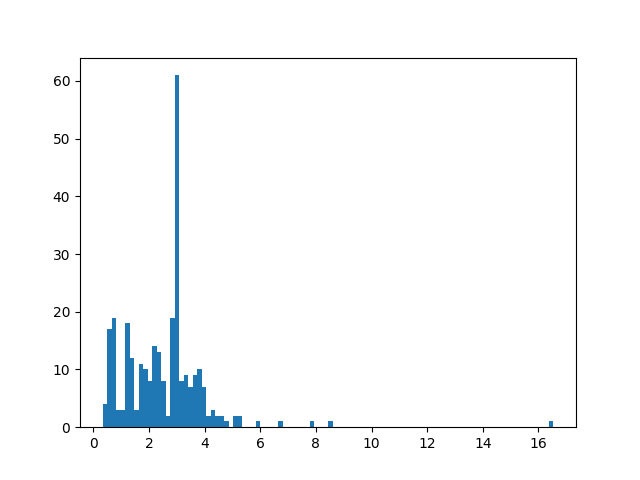

In [ ]:
mu = np.mean(X_train, axis=0)
s = np.cov(X_train.T)
s_inv = np.linalg.inv(s)
# print(mu)
# print(s_inv)

def m_dist(x, mu, s):
    return np.sqrt(x.dot(s_inv).dot(x.T))

d_valid = np.stack([m_dist(x, mu, s) for x in X_valid.to_numpy()], axis=0)

fig_dist = plt.figure()
ax = fig_dist.add_subplot(111)
ax.hist(d_valid, 100)

In [ ]:
acc_valid = []
for q in range(1, 101):
    thres = np.percentile(d_valid, q)
    y_pred_valid = d_valid >= thres
    acc_valid.append(accuracy_score(Y_valid, y_pred_valid))
best_thres = np.percentile(d_valid, np.argmax(acc_valid))

d_test = np.stack([m_dist(x, mu, s) for x in X_test.to_numpy()], axis=0)
y_pred_test = d_test >= thres

print(accuracy_score(y_true=Y_test, y_pred=y_pred_test))
print(recall_score(y_true=Y_test, y_pred=y_pred_test))

0.5563598759048604
0.09957627118644068


c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

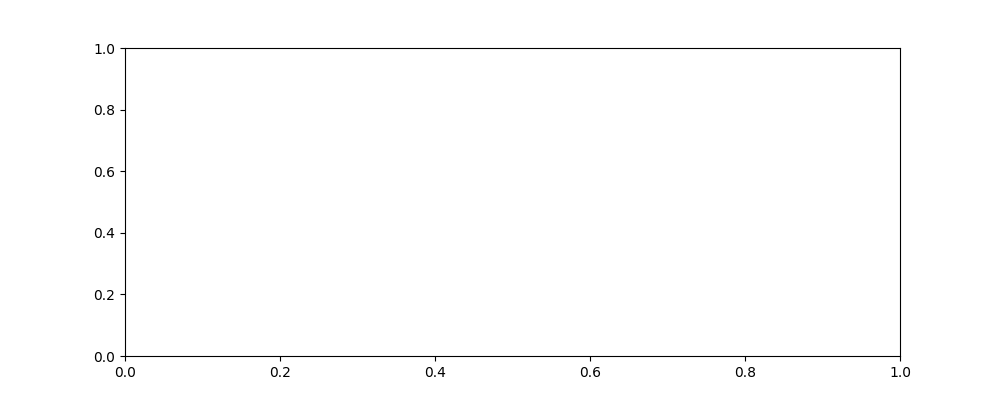

In [ ]:
recall_mdist = []
accuracy_mdist = []
precision_mdist = []
THRES = 90  # percentage
t = np.percentile(d_valid, THRES)
for df in df_list:
    
    X = df.drop(['class', 'noise level'], axis = 1)
    Y = df['class']
    y_true = Y.to_numpy().astype('float')
    y_dist = np.stack([m_dist(x, mu, s) for x in X.to_numpy()], axis=0)
    
    y_pred = y_dist >= t  # OOD if prob >= THRES

    recall_mdist.append(recall_score(y_true, y_pred))
    accuracy_mdist.append(accuracy_score(y_true, y_pred))
    precision_mdist.append(precision_score(y_true, y_pred))

fig_mdist = plt.figure(figsize=(10,4))
ax = fig_mdist.add_subplot(111)
# ax2 = ax.twinx()
ax.plot([0.0, 0.009,0.01, 0.02, 0.04, 0.06, 0.08, 0.10],recall_mdist,label = "recall")
ax.plot([0.0, 0.009,0.01, 0.02, 0.04, 0.06, 0.08, 0.10],accuracy_mdist,label = "accuracy")
# ax.plot([0.0,0.02,0.03],precisions,label = "precision")
ax.legend()

# Classifier visualization


(861, 2)


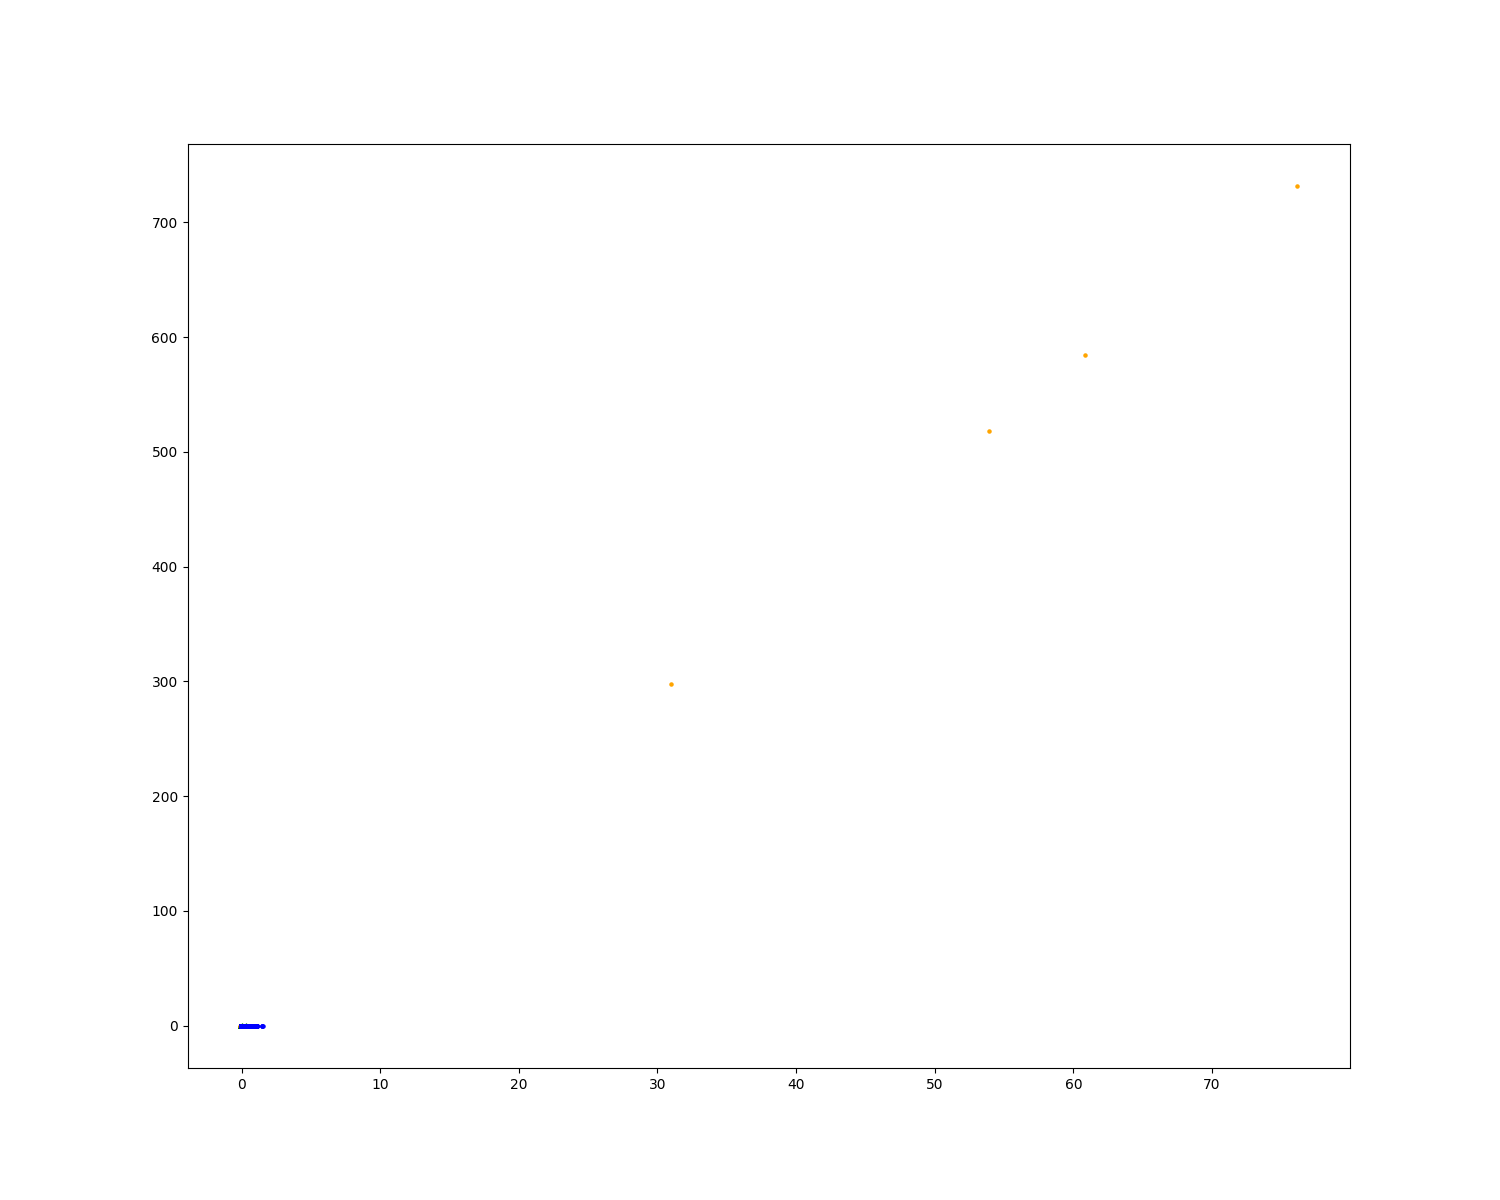

In [ ]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(train_df.drop(['class', 'c'], axis=1))

train_df0_trans, train_df1_trans = pca.transform(train_df0.drop(['class', 'c'], axis=1)), pca.transform(train_df1.drop(['class', 'c'], axis=1))
print(train_df0_trans.shape)
val_df0_trans, val_df1_trans = pca.transform(val_df0.drop(['class', 'c'], axis=1)), pca.transform(val_df1.drop(['class', 'c'], axis=1))

fig_pca = plt.figure(figsize= (15,12))
ax = fig_pca.add_subplot(111)

ax.scatter(train_df0_trans[:,0], train_df0_trans[:,1], marker="^", c= 'r',s=5, label = 'train_class0')
ax.scatter(train_df1_trans[:,0], train_df1_trans[:,1], marker="^", c= 'g',s=5, label = 'train_class1')
ax.scatter(val_df0_trans[:,0], val_df0_trans[:,1], marker="o", c= 'orange',s=5, label = 'test_class0')
ax.scatter(val_df1_trans[:,0], val_df1_trans[:,1], marker="o", c= 'blue',s=5, label = "test_class1")

(0.0, 0.12)

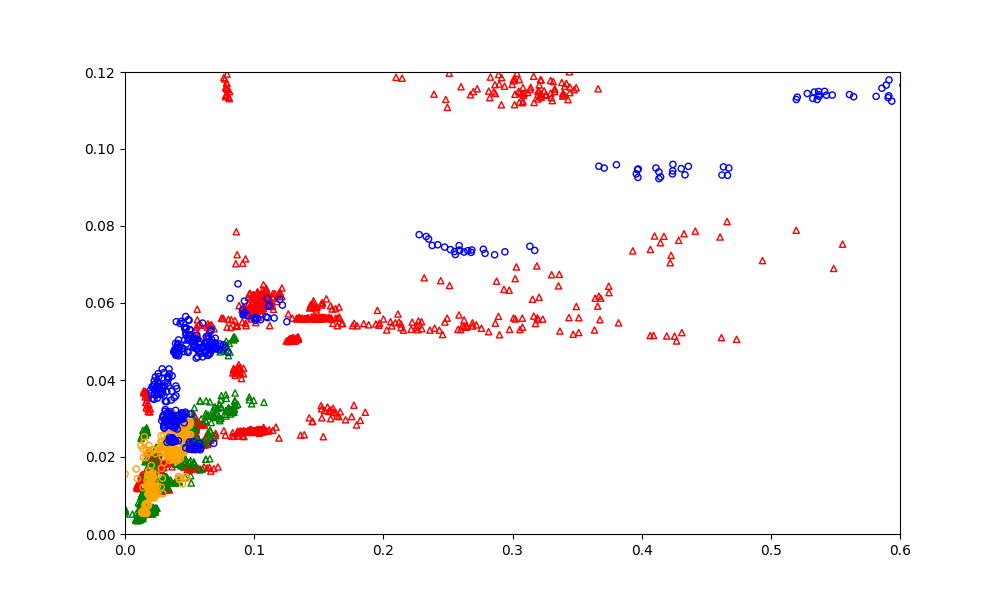

In [ ]:
fig_comp = plt.figure(figsize=(10,6))
ax = fig_comp.add_subplot(111)

ax.scatter(train_df1['rmse_fit_list'], train_df1['xrmse_list'], marker="^", edgecolors= 'r',s=20, facecolors='none', label = 'train_class1')
ax.scatter(train_df0['rmse_fit_list'], train_df0['xrmse_list'], marker="^", edgecolors= 'g',s=20, facecolors='none', label = 'train_class0')
ax.scatter(val_df0['rmse_fit_list'], val_df0['xrmse_list'], marker="o", edgecolors= 'orange',s=20, facecolors='none', label = 'test_class0')
ax.scatter(val_df1['rmse_fit_list'], val_df1['xrmse_list'], marker="o", edgecolors= 'blue',s=20, facecolors='none', label = "test_class1")

# ADD CLASSIFIER BOUNDARIES HERE

ax.set_xlim([0.00, 0.6])
ax.set_ylim([0.00, 0.12])

In [ ]:
# draw decision boundary
rmse_fit_grid, xrmse_grid = np.meshgrid(np.linspace(0.0, 0.6, 80), np.linspace(0.0, 0.12, 40))
rmse_fit_db, xrmse_db = rmse_fit_grid.reshape(-1), xrmse_grid.reshape(-1)
# rmse_fit_db += np.random.normal(0, 0.001, [len(rmse_fit_db),])
# xrmse_db += np.random.normal(0, 0.001, [len(xrmse_db),])
xrmse_fit_db, bias_db, xbias_db = np.mean(X_train['xrmse_fit_list'])*np.ones_like(xrmse_db), np.mean(X_train['bias_list'])*np.ones_like(xrmse_db), np.mean(X_train['xbias_list'])*np.ones_like(xrmse_db)
df_db = pd.DataFrame({'rmse_fit_list':rmse_fit_db, 'xrmse_fit_list':xrmse_fit_db, 'xrmse_list':xrmse_db, 'bias_list':bias_db, 'xbias_list':xbias_db})

p_db = xg_best.predict_proba(df_db)[:,1]
p_db = p_db.reshape(xrmse_grid.shape)

im = ax.contour(rmse_fit_grid, xrmse_grid, p_db, [0.2, 0.5, 0.8])
# plt.colorbar(im)

In [ ]:
X_train.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'

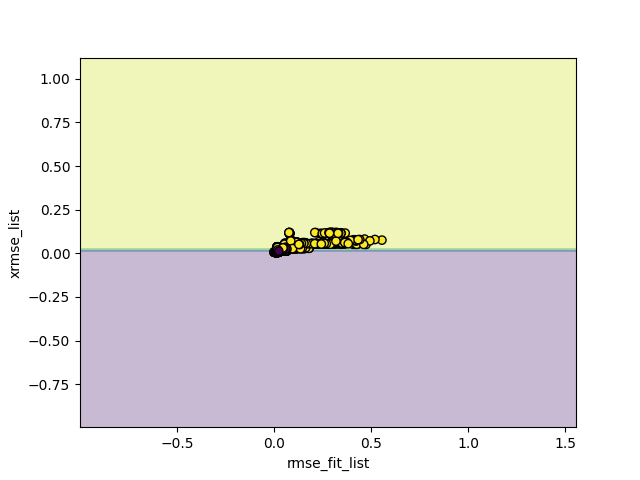

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

classifier = xg_best.fit(X_train[['rmse_fit_list','xrmse_list']], Y_train)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[['rmse_fit_list','xrmse_list']], response_method="predict",
    xlabel= 'rmse_fit_list', ylabel= 'xrmse_list',
    alpha=0.3,)
disp.ax_.scatter(X_train['rmse_fit_list'], X_train['xrmse_list'], c=Y_train, edgecolor="k")



## Figures

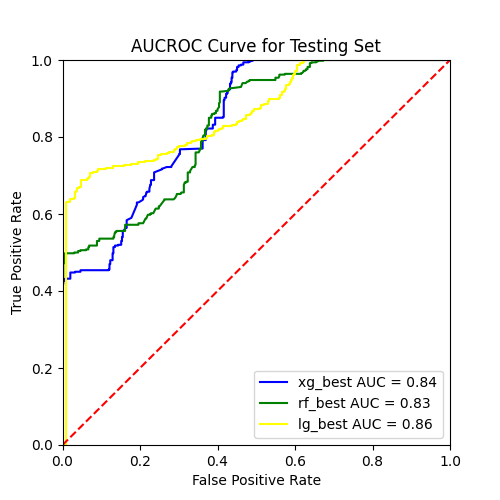

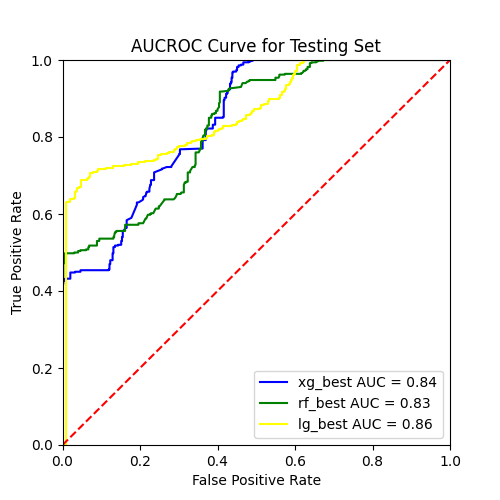

In [ ]:
# AUCROC curve for testing set(snp not included)
test_probs = xg_best.predict_proba(X_test)
test_preds = test_probs[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(Y_test, test_preds)
roc_auc = metrics.auc(fpr2, tpr2)

test_probs2 = rf_best.predict_proba(X_test)
test_preds2 = test_probs2[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(Y_test, test_preds2)
roc_auc2 = metrics.auc(fpr3, tpr3)

test_probs3 = lg_best.predict_proba(X_test)
test_preds3 = test_probs3[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(Y_test, test_preds3)
roc_auc3 = metrics.auc(fpr4, tpr4)

import matplotlib.pyplot as plt

fig_aoc = plt.figure(figsize=(5,5))
ax = fig_aoc.subplots(1)

ax.set_title('AUCROC Curve for Testing Set')
ax.plot(fpr2, tpr2, 'b', label = 'xg_best AUC = %0.2f' % roc_auc)
ax.plot(fpr3, tpr3, 'green', label = 'rf_best AUC = %0.2f' % roc_auc2)
ax.plot(fpr4, tpr4, 'yellow', label = 'lg_best AUC = %0.2f' % roc_auc3)
ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
fig_aoc.show()




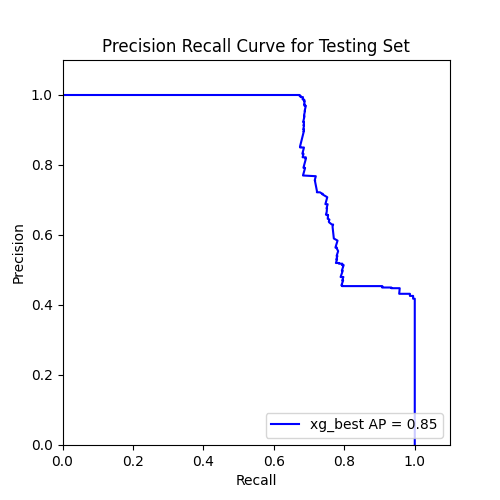

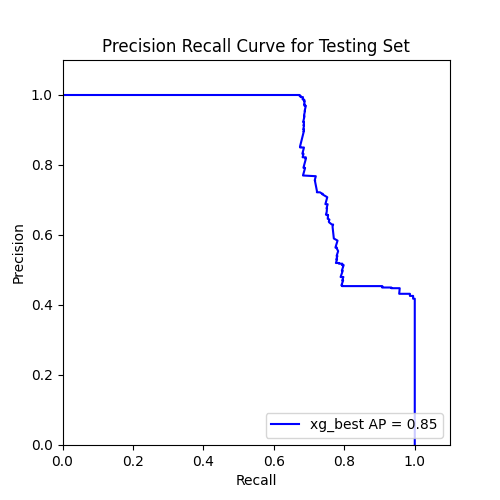

In [ ]:
# Recall Precision curve for testing set(snp not included)
test_probs = xg_best.predict_proba(X_test)
test_preds = test_probs[:,1]
recall, precision, threshold2 = metrics.precision_recall_curve(Y_test, test_preds)

recall = [*[0],*recall]
precision = [*[1],*precision]
threshold2 = [*[0],*threshold2]

import matplotlib.pyplot as plt

fig_aoc = plt.figure(figsize=(5,5))
ax = fig_aoc.subplots(1)

ax.set_title('Precision Recall Curve for Testing Set')
ax.plot(recall, precision, 'b', label = 'xg_best AP = %0.2f' % average_precision_score(Y_test,xg_best.predict_proba(X_test)[:,1]))
ax.legend(loc = 'lower right')
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
fig_aoc.show()




In [ ]:
wk_dir = r'G:\DeepRFT\GoPro04101100SNP'
inputds = glob.glob(wk_dir+r'\GoPro0410_11_00*')

fig3_df = pd.DataFrame()

for inputd in inputds:
    df = pd.read_csv(inputd + r'\RMSE_fit5_alt.csv')
    df['noise level'] = float(inputd.split('\\')[-1].split('_')[-2].split('=')[-1])
    if float(inputd.split('\\')[-1].split('_')[-2].split('=')[-1]) < 0.01:
        df['class'] = 0
    else:
        df['class'] = 1
    
    df = remove_outliers(df)
    print(df.describe())
    fig3_df = pd.concat([fig3_df,df],axis=0)

       rmse_fit_list  xrmse_fit_list  rmse_list  xrmse_list  bias_list  \
count      23.000000       23.000000  23.000000   23.000000  23.000000   
mean        0.146740        0.004983   0.072134    0.038583   0.019015   
std         0.007294        0.000682   0.002406    0.000673   0.000822   
min         0.133377        0.003919   0.069234    0.037426   0.017685   
25%         0.141394        0.004453   0.070411    0.038172   0.018293   
50%         0.146103        0.004887   0.072042    0.038627   0.019122   
75%         0.154023        0.005303   0.072504    0.039043   0.019378   
max         0.160619        0.006412   0.078006    0.039607   0.020841   

       xbias_list  class   noise level  
count   23.000000   23.0  2.300000e+01  
mean     0.014454    0.0  3.000000e-03  
std      0.000689    0.0  8.868554e-19  
min      0.013364    0.0  3.000000e-03  
25%      0.013858    0.0  3.000000e-03  
50%      0.014451    0.0  3.000000e-03  
75%      0.014900    0.0  3.000000e-03  
max  

In [ ]:
fig3_df

,rmse_fit_list,xrmse_fit_list,rmse_list,xrmse_list,bias_list,xbias_list,class,noise level
0,0.140135,0.004461,0.069745,0.037559,0.018070,0.013646,0,0.003
1,0.155200,0.005356,0.070900,0.038288,0.017886,0.013608,0,0.003
2,0.156752,0.005154,0.070216,0.037879,0.018326,0.013786,0,0.003
3,0.156698,0.005251,0.070102,0.037567,0.018126,0.013619,0,0.003
4,0.146103,0.005316,0.069914,0.037587,0.018166,0.013650,0,0.003
...,...,...,...,...,...,...,...,...
16,2.561813,0.000000,0.089120,0.072539,0.018845,0.012689,1,0.020
17,1.652184,0.000000,0.088996,0.072297,0.017930,0.012377,1,0.020
18,2.669956,0.000000,0.088728,0.072403,0.018967,0.012796,1,0.020
19,1.578279,0.000000,0.088158,0.072680,0.017192,0.011615,1,0.020


In [ ]:
df_n_0 = fig2_df[fig2_df['noise level'] == '0.00']  # in-distribution, same with Fig.2
df_n_1 = fig3_df[fig3_df['noise level'] == 0.01]
df_n_2 = fig3_df[fig3_df['noise level'] == 0.02]
df_n_3 = fig3_df[fig3_df['noise level'] == 0.03]
df_n_4 = fig3_df[fig3_df['noise level'] == 0.04]
df_n_06 = fig3_df[fig3_df['noise level'] == 0.006]
df_n_03 = fig3_df[fig3_df['noise level'] == 0.003]
df_n_09 = fig3_df[fig3_df['noise level'] == 0.009]
df_n_6 = fig3_df[fig3_df['noise level'] == 0.06]
df_n_8 = fig3_df[fig3_df['noise level'] == 0.08]
df_n_10 = fig3_df[fig3_df['noise level'] == 0.10]

df3_list = [df_n_0,
    df_n_03,
    df_n_06,
    df_n_09,
    df_n_1,df_n_2,df_n_3,df_n_6,df_n_10]
print('# of ID samples ', len(df_n_0))
print('# of OOD samples ', len(df_n_03)+len(df_n_06)+len(df_n_09)+len(df_n_1)+len(df_n_2)+len(df_n_3)+len(df_n_6)+len(df_n_10))

# of ID samples  224
# of OOD samples  453


In [ ]:
recall_vals_snp = []
accuracys_snp = []
precisions_snp = []
THRES = 0.82
for df3 in df3_list:
    
    try:
        X = df3.drop(['class', 'noise level','rmse_list'], axis = 1)
    except:
        X = df3.drop(['class', 'noise level'], axis=1)
    Y = 1 if np.all(df3['noise level'].to_numpy().astype('float') > 0.0) else 0
    y_true = Y * np.ones([len(X),])
    y_prob = xg_best.predict_proba(X).astype('float')
    y_pred = y_prob[:,1] >= THRES  # OOD if prob >= THRES

    recall_vals_snp.append(recall_score(y_true, y_pred))
    accuracys_snp.append(accuracy_score(y_true, y_pred))
    precisions_snp.append(precision_score(y_true, y_pred))

c:\Users\OzcanAlienware\torch_1.9\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


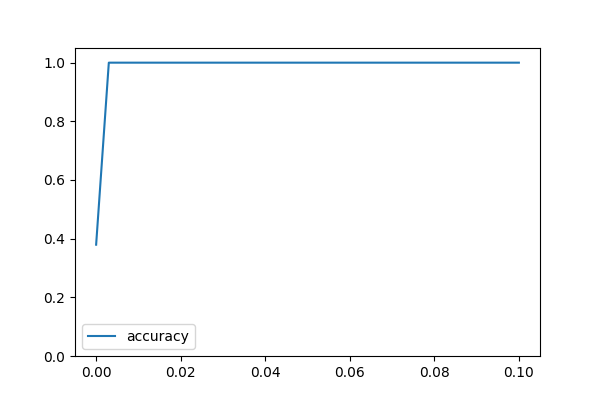

In [ ]:
fig3 = plt.figure(figsize=(6,4))
ax = fig3.add_subplot(111)
# ax2 = ax.twinx()
# ax.plot([0.0, 0.003, 0.006, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10],recall_vals,label = "recall")
ax.plot([0.0, 0.003, 0.006, 0.009, 0.01, 0.02, 0.03, 0.06, 0.10],accuracys_snp,label = "accuracy")
# ax.plot([0.0,0.02,0.03],precisions,label = "precision")
ax.set_ylim([0,1.05])
ax.legend()
# ax2.errorbar([0.0, 0.003, 0.006, 0.009, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.10],rmse_mean,rmse_std,color='gray',label = "RMSE")
# ax2.legend()

# SNP Table

In [ ]:
inputds = [r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.01\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.02\RMSE_fit5_alt.csv',
         #   r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.03\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.04\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.06\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.08\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_03_s=38_i=0.00_n=0.10\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.02\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.2\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=38_i=0.75_n=0.3\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.02\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.2\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_01_s=57_i=0.25_n=0.3\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.009\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=38_i=0.25_n=0.02\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.00\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.003\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.006\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.009\RMSE_fit5_alt.csv',
          #  r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.2\RMSE_fit5_alt.csv',
           r'G:\DeepRFT\GoPro04101100\GoPro0410_11_00_02_s=57_i=0.00_n=0.02\RMSE_fit5_alt.csv'
        ]


In [ ]:
fig2_df = pd.DataFrame()
fig2_rmse = pd.DataFrame()

for inputd in inputds:
    df_i = pd.read_csv(inputd)
    df_i['noise level'] = inputd.split('\\')[-2].split('=')[-1]
    # print(inputd, df_i['noise level'])
    rmse_i = df_i['rmse_list']
    df_i = df_i.drop('rmse_list', axis=1)
    print(df_i.describe())
    fig2_df = pd.concat([fig2_df,df_i],axis=0)
    fig2_rmse = pd.concat([fig2_rmse,rmse_i], axis=0)

       rmse_fit_list  xrmse_fit_list  xrmse_list   bias_list  xbias_list  \
count     134.000000      134.000000  134.000000  134.000000  134.000000   
mean        0.041670        0.003903    0.027082    0.039300    0.024484   
std         0.004068        0.000597    0.001784    0.002393    0.001604   
min         0.034823        0.002936    0.023768    0.035457    0.021372   
25%         0.038500        0.003469    0.025744    0.037616    0.023423   
50%         0.041260        0.003772    0.027004    0.039165    0.024283   
75%         0.044312        0.004381    0.027963    0.040451    0.025320   
max         0.051967        0.005768    0.033236    0.046930    0.029865   

       class  
count  134.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  
       rmse_fit_list  xrmse_fit_list  xrmse_list  bias_list  xbias_list  class
count      39.000000       39.000000   39.000000  39.000000   39.000000   39.0
mean        0.045851  

In [ ]:
df_n_0 = fig2_df[fig2_df['noise level'] == '0.00']
df_n_1 = fig2_df[fig2_df['noise level'] == '0.01']
df_n_2 = fig2_df[fig2_df['noise level'] == '0.02']
#df_n_3 = fig2_df[fig2_df['noise level'] == '0.03']
df_n_4 = fig2_df[fig2_df['noise level'] == '0.04']
df_n_06 = fig2_df[fig2_df['noise level'] == '0.006']
df_n_03 = fig2_df[fig2_df['noise level'] == '0.003']
df_n_09 = fig2_df[fig2_df['noise level'] == '0.009']
df_n_6 = fig2_df[fig2_df['noise level'] == '0.06']
df_n_8 = fig2_df[fig2_df['noise level'] == '0.08']
df_n_10 = fig2_df[fig2_df['noise level'] == '0.10']

In [ ]:
df_n_0['class'] = list(np.zeros(224))

C:\Users\OzcanAlienware\AppData\Local\Temp\ipykernel_25324\3173903957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_0['class'] = list(np.zeros(224))


In [ ]:
df_n_0['class'].max()

0.0

In [ ]:
noise_lvl = [0.01, 0.02]
n_sample_1 = np.amin([len(df_n_0), len(df_n_1), 100])
df_gn_1 = pd.concat((df_n_0.sample(n = n_sample_1, random_state = 10), df_n_1.sample(n = n_sample_1)))  # sample method can also take in random_state argument
n_sample_2 = np.amin([len(df_n_0), len(df_n_2), 100])
df_gn_2 = pd.concat((df_n_0.sample(n_sample_1, random_state = 10), df_n_2.sample(n_sample_2)))
df_gn = pd.concat([df_n_1, df_n_2, df_n_4, df_n_6, df_n_8, df_n_10])
df_gn_mix = pd.concat((df_n_0.sample(100, random_state = 10), df_gn.sample(weights = 'noise level', n = 100)))

df_gn_list = [df_gn_1, df_gn_2, df_gn_mix]

auroc_list = []
ap_list = []
accuracy_list = []
THRES = 0.89
for df in df_gn_list:
    
    X = df.drop(['class', 'noise level'], axis = 1)
    Y = df['noise level'].to_numpy().astype('float') >= 0.01
    test_probs = xg_best.predict_proba(X)
    test_preds = test_probs[:,1]
    fpr2, tpr2, threshold2 = metrics.roc_curve(Y, test_preds)
    #recall,precision, threshold3 = metrics.precision_recall_curve(Y_test,test_preds)
    roc_auc = metrics.auc(fpr2, tpr2)
    apscore = average_precision_score(Y, xg_best.predict_proba(X)[:,1])

    y_true = Y
    y_prob = xg_best.predict_proba(X).astype('float')
    y_pred = y_prob[:,1] >= THRES  # OOD if prob >= THRES

    accuracy_list.append(accuracy_score(y_true, y_pred))

    auroc_list.append(roc_auc)
    ap_list.append(apscore)

print(auroc_list,ap_list,accuracy_list)

[0.6500252993759487, 0.6575324675324675, 0.8099000000000001] [0.5691039286972401, 0.7414879424489516, 0.856269863172858] [0.6233766233766234, 0.5988700564971752, 0.72]


In [ ]:
wk_dir = r'G:\DeepRFT\GoPro04101100SNP'
inputds = glob.glob(wk_dir+r'\GoPro0410_11_00*')

fig3_df = pd.DataFrame()

for inputd in inputds:
    df = pd.read_csv(inputd + r'\RMSE_fit5_alt.csv')
    df['noise level'] = float(inputd.split('\\')[-1].split('_')[-2].split('=')[-1])
    if float(inputd.split('\\')[-1].split('_')[-2].split('=')[-1]) < 0.01:
        df['class'] = 0
    else:
        df['class'] = 1
    
    df = remove_outliers(df)
    print(df.describe())
    fig3_df = pd.concat([fig3_df,df],axis=0)


       rmse_fit_list  xrmse_fit_list  rmse_list  xrmse_list  bias_list  \
count      23.000000       23.000000  23.000000   23.000000  23.000000   
mean        0.146740        0.004983   0.072134    0.038583   0.019015   
std         0.007294        0.000682   0.002406    0.000673   0.000822   
min         0.133377        0.003919   0.069234    0.037426   0.017685   
25%         0.141394        0.004453   0.070411    0.038172   0.018293   
50%         0.146103        0.004887   0.072042    0.038627   0.019122   
75%         0.154023        0.005303   0.072504    0.039043   0.019378   
max         0.160619        0.006412   0.078006    0.039607   0.020841   

       xbias_list  class   noise level  
count   23.000000   23.0  2.300000e+01  
mean     0.014454    0.0  3.000000e-03  
std      0.000689    0.0  8.868554e-19  
min      0.013364    0.0  3.000000e-03  
25%      0.013858    0.0  3.000000e-03  
50%      0.014451    0.0  3.000000e-03  
75%      0.014900    0.0  3.000000e-03  
max  

In [ ]:
df_n_0sp = fig2_df[fig2_df['noise level'] == '0.00']  # in-distribution, same with Fig.2
df_n_1sp = fig3_df[fig3_df['noise level'] == 0.01]
df_n_2sp = fig3_df[fig3_df['noise level'] == 0.02]
#df_n_3 = fig2_df[fig2_df['noise level'] == '0.03']
df_n_4sp = fig3_df[fig3_df['noise level'] == 0.04]
df_n_06sp = fig3_df[fig3_df['noise level'] == 0.006]
df_n_03sp = fig3_df[fig3_df['noise level'] == 0.003]
df_n_09sp = fig3_df[fig3_df['noise level'] == 0.009]
df_n_6sp = fig3_df[fig3_df['noise level'] == 0.06]
df_n_8sp = fig3_df[fig3_df['noise level'] == 0.08]
df_n_10sp = fig3_df[fig3_df['noise level'] == 0.10]

In [ ]:
df_n_0sp['class'].max()

0.0

In [ ]:
df_n_1sp['class'] = list(np.ones(80))

C:\Users\OzcanAlienware\AppData\Local\Temp\ipykernel_25324\3568181035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_1sp['class'] = list(np.ones(80))


In [ ]:
df_n_1sp['class'].min()

1.0

In [ ]:
df_n

In [ ]:
noise_lvl = [0.01, 0.02]
n_sample_1 = np.amin([len(df_n_0sp), len(df_n_1sp), 100])
df_gn_1sp = pd.concat((df_n_0sp.sample(n = n_sample_1, random_state = 10), df_n_1sp.sample(n = n_sample_1, random_state = 10)))  # sample method can also take in random_state argument
n_sample_2 = np.amin([len(df_n_0sp), len(df_n_2sp), 100])
df_gn_2sp = pd.concat((df_n_0sp.sample(n_sample_1, random_state = 10), df_n_2sp.sample(n_sample_2,random_state = 10)))
df_gnsp = pd.concat([df_n_1sp, df_n_2sp, df_n_4sp, df_n_6sp, df_n_8sp, df_n_10sp])
df_gn_mixsp = pd.concat((df_n_0sp.sample(100, random_state = 10), df_gnsp.sample(weights = 'noise level', n = 100, random_state = 10)))

df_gn_listsp = [df_gn_1sp, df_gn_2sp, df_gn_mixsp]

auroc_listsp = []
ap_listsp = []
accuracy_listsp = []
THRES = 0.89
for df in df_gn_listsp:
    
    X = df.drop(['class', 'noise level','rmse_list'], axis = 1)
    Y = df['noise level'].to_numpy().astype('float') >= 0.01
    test_probs = xg_best.predict_proba(X)
    test_preds = test_probs[:,1]
    print(test_preds)
    fpr2, tpr2, threshold2 = metrics.roc_curve(Y, test_preds)
    #recall,precision, threshold3 = metrics.precision_recall_curve(Y_test,test_preds)
    roc_auc = metrics.auc(fpr2, tpr2)
    print(fpr2, tpr2)
    apscore = average_precision_score(Y, xg_best.predict_proba(X)[:,1])

    y_true = Y
    y_prob = xg_best.predict_proba(X).astype('float')
    y_pred = y_prob[:,1] >= THRES  # OOD if prob >= THRES

    accuracy_listsp.append(accuracy_score(y_true, y_pred))

    auroc_listsp.append(roc_auc)
    ap_listsp.append(apscore)

print(auroc_listsp,ap_listsp,accuracy_listsp)

[0.8556001  0.9572875  0.8622728  0.8622728  0.8622728  0.31299937
 0.8556001  0.8622728  0.8622728  0.830505   0.5338697  0.01673252
 0.90082544 0.8467464  0.00930091 0.8739255  0.85616696 0.8622728
 0.96422875 0.01327511 0.966953   0.15460125 0.00889703 0.8739255
 0.23843092 0.25573877 0.9373771  0.8622728  0.9572875  0.9571216
 0.00876594 0.00741102 0.00668555 0.95782703 0.00669238 0.74363464
 0.00741102 0.86929625 0.8622728  0.01246069 0.9595352  0.8739255
 0.9335655  0.8467464  0.8622728  0.00669238 0.00669238 0.9572875
 0.9569556  0.836118   0.9571216  0.9572875  0.9246077  0.9571216
 0.9374195  0.8739255  0.00864105 0.86929625 0.9367481  0.86609024
 0.8739255  0.8216181  0.00723901 0.96408933 0.9438871  0.9571216
 0.00874496 0.01120723 0.8694352  0.34788644 0.00837915 0.6201495
 0.86929625 0.86929625 0.00877692 0.8622728  0.9396692  0.23582563
 0.22452159 0.81766087 0.99615604 0.99615604 0.99605656 0.996231
 0.99591833 0.9964948  0.996231   0.993881   0.99594265 0.996231
 0.9961